# Linear Regression on Boston Houses Prices Data

In this project we will use the Linear Regression algorithm on the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset). 

In [31]:
# Importing libraries needed for this exercise
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

We will first examine the data to see what are we dealing with

### Data Pre-processing

In [32]:
boston_housing_data = skdata.load_boston()

In [33]:
df = pd.DataFrame(boston_housing_data.data, columns=boston_housing_data.feature_names)
df['target'] = boston_housing_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [35]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We see that for the different house prices variables are continuous. There's no need to drop any variable this time, also, there's no missing variables. The scales for the features is different, so we could do some normalization. First, we will split the data into train and validation set.

### Data Splitting

In [36]:
x = boston_housing_data.data
y = boston_housing_data.target

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=5)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(404, 13) (404,)
(102, 13) (102,)


### Data Normalization

In [37]:
scaler = StandardScaler()
# We don't need to normalize the data for the first column since it is just 1's and 0's
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_val[:, 1:] = scaler.transform(x_val[:, 1:])

In [38]:
df_train = pd.DataFrame(x_train, columns=boston_housing_data.feature_names)
df_train['target'] = y_train
df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,1.15172,-0.507766,-0.402012,-0.272888,-0.118484,-0.848834,0.963877,-0.022455,-0.636453,-0.583618,1.175619,-0.000302,0.835288,13.1
1,0.01501,3.331365,-1.431888,3.664502,-1.314148,2.361809,-1.516597,0.999022,-0.981745,-1.231926,-2.202859,0.412907,-1.325495,50.0
2,73.53410,-0.507766,1.078157,-0.272888,1.112090,-0.478931,1.140549,-0.988813,1.665490,1.551633,0.810378,-3.849276,1.158196,8.8
3,0.04527,-0.507766,0.161225,-0.272888,0.186977,-0.243407,0.317257,-0.752702,-0.981745,-0.785842,1.175619,0.428424,-0.483373,20.6
4,9.59571,-0.507766,1.078157,-0.272888,1.234274,0.166954,1.140549,-1.068474,1.665490,1.551633,0.810378,0.194665,1.114099,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,5.69175,-0.507766,1.078157,-0.272888,0.274252,-0.252077,0.426794,-0.139951,1.665490,1.551633,0.810378,0.380975,0.355904,19.1
400,0.08370,1.411799,-1.100485,-0.272888,-0.999959,1.295448,-1.018382,0.357105,-0.521356,-0.042371,-1.472377,0.428424,-1.008277,34.9
401,0.17899,-0.507766,-0.171664,-0.272888,0.291707,-0.893627,-1.375260,-0.503833,-0.406259,-0.084005,0.353827,0.387834,0.728600,23.1
402,0.22969,-0.507766,-0.037914,-0.272888,-0.546130,0.054249,-0.537835,0.253974,-0.636453,-0.762051,0.079896,0.405599,-0.214520,24.4


In [39]:
df_val = pd.DataFrame(x_val, columns=boston_housing_data.feature_names)
df_val['target'] = y_val
df_val

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.38214,-0.507766,-0.690318,-0.272888,-0.415218,2.530867,0.663534,-0.300735,-0.176064,-0.583618,-0.467965,0.321383,-1.329763,37.6
1,0.03615,2.904795,-0.876082,-0.272888,-1.226873,0.493509,-1.566065,0.624915,-0.636453,-0.952380,0.353827,0.428424,-1.106430,27.9
2,0.04684,-0.507766,-1.104943,-0.272888,-0.546130,0.185738,-0.057287,-0.360822,-0.866648,-0.803686,-0.285344,0.375353,-0.521781,22.6
3,11.10810,-0.507766,1.078157,-0.272888,1.016087,-1.997557,1.140549,-1.294799,1.665490,1.551633,0.810378,0.428424,3.171039,13.8
4,0.22188,0.345374,-0.577373,3.664502,-0.764317,2.026585,-0.562569,0.259622,-0.751550,-1.083231,0.079896,0.359499,-0.838999,35.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.02899,1.198514,-1.425944,-0.272888,-1.069779,0.939994,-1.173854,2.414571,-0.981745,-0.417080,0.582103,0.349155,-0.937152,26.6
98,0.21719,-0.507766,-0.037914,3.664502,-0.546130,-0.695671,-0.491900,-0.087996,-0.636453,-0.762051,0.079896,0.361411,0.505267,22.4
99,2.44668,-0.507766,1.298101,-0.272888,2.787765,-1.468711,0.928542,-1.021048,-0.521356,-0.012632,-1.700653,-3.037699,0.520915,13.1
100,5.82401,-0.507766,1.078157,-0.272888,-0.170849,-0.067125,-0.106755,-0.199210,1.665490,1.551633,0.810378,0.428424,-0.247237,23.0


### Linear Regression

In [40]:
# Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_val)

# Coefficients and intercept
print("Coefficients: \n", model.coef_)
print("\nIntercept: \n", model.intercept_)

# mean squeared error (mse) and coefficient of determination (R^2)
print('\nMean squared error (mse): %.2f'
      % mean_squared_error(y_val, predictions))
print('\nCoefficient of determination (R2): %.2f'
      % r2_score(y_val, predictions))


Coefficients: 
 [-0.13079985  1.15814527  0.00737057  0.68709635 -1.82837001  2.36271879
  0.03166538 -3.06632775  3.16621482 -2.21457852 -2.08600876  1.0449511
 -4.17627077]

Intercept: 
 23.11122784111545

Mean squared error (mse): 20.87

Coefficient of determination (R2): 0.73


From the results we can see how our model performs in an unseen dataset. Our mse is 20.87 and our R2 is 0.73. This means that our performance is okay. The optimum will be to have a mse of 0 and an R2 of 1, but we are in that direction. There are different reasons why we do not have better values for this metrics. An important one to consider is that the size of our data is small. We only have 404 observations for the training set, more data will help to create a better model.

In [41]:
boston_housing_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Here the coefficients try to explain what happens if we increase by 1 the value of a feature and everything else remains the same. For instance, if the first variable (Crime) increases by 1, then the price of a house will decrease by -1.31e-1.

### Additional notes - Residuals Plot

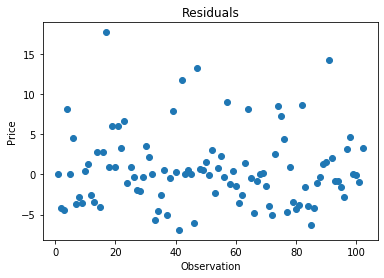

In [42]:
residuals = y_val - predictions
plt.scatter(range(1, len(residuals)+1), residuals)
plt.title('Residuals')
plt.ylabel("Price")
plt.xlabel("Observation")
plt.show()

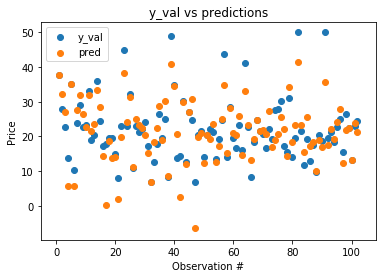

In [43]:
plt.scatter(range(1, len(residuals)+1), y_val, label='y_val')
plt.scatter(range(1, len(residuals)+1), predictions, label='pred')
plt.ylabel("Price")
plt.xlabel("Observation #")
plt.legend()
plt.title("y_val vs predictions")
plt.show()

### Additional notes - Plotting relation between variables in data

In [44]:
from pandas.plotting import scatter_matrix

data = pd.DataFrame(x, columns=boston_housing_data.feature_names)

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


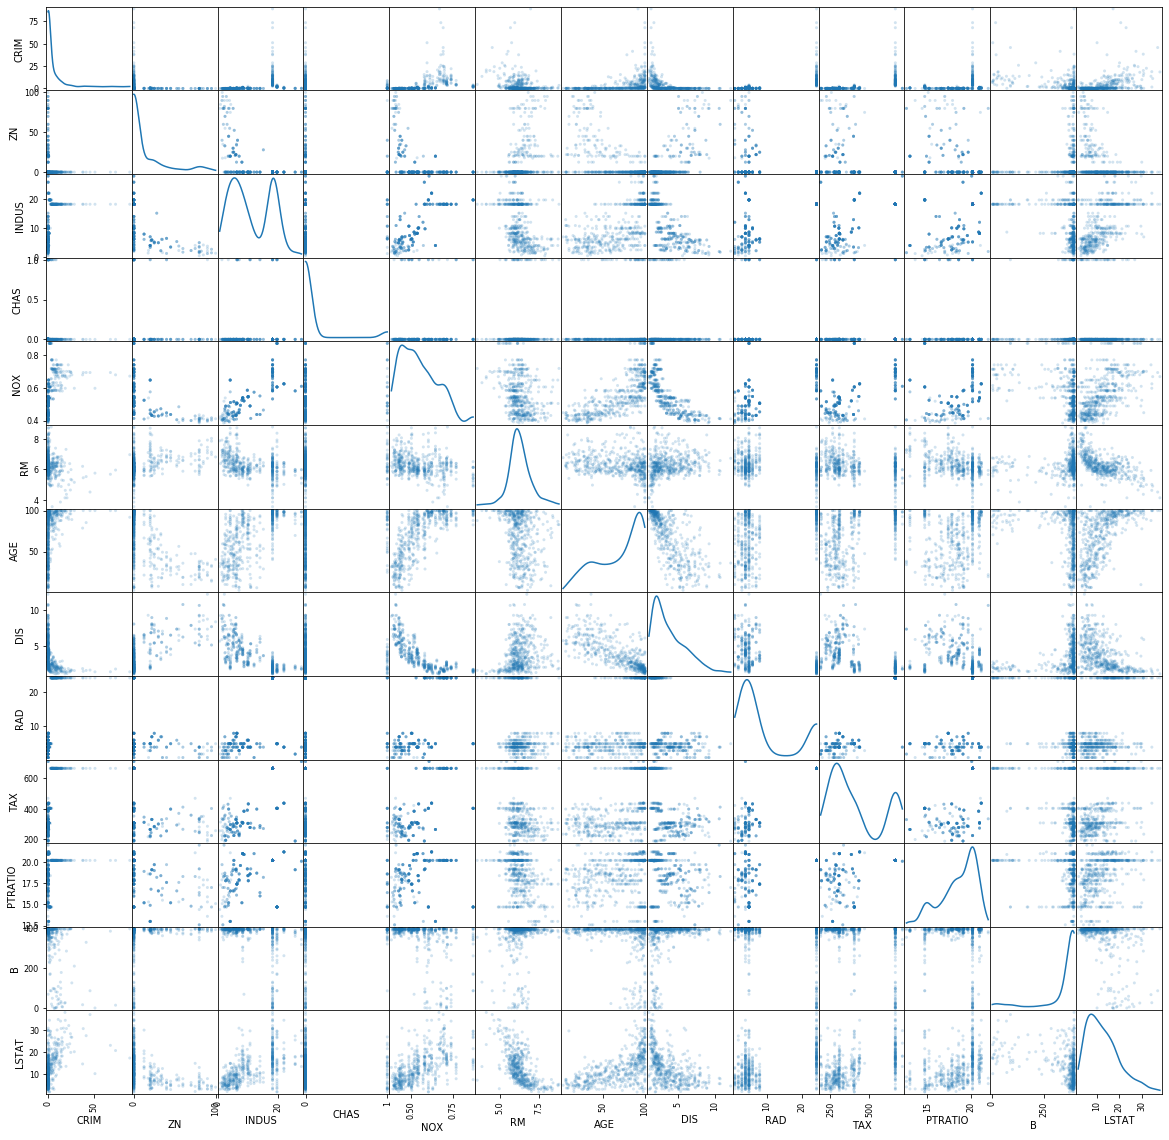

In [45]:
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde');